In [2]:
import os
from statistics import stdev

# Detect if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Clone your repo into Colab
    repo_url = "https://github.com/SuperaNova/MLC.git"
    repo_name = "MLC"

    if not os.path.exists(repo_name):
        !git clone $repo_url
    %cd $repo_name/notebooks

    # Install requirements
    !pip install -r ../requirements.txt

print("Colab setup complete.")


Colab setup complete.


In [9]:
# Import libraries
import pandas as pd

# Load dataset (assumes you downloaded it to data/)
data_path = "C:\\Users\ewica\PycharmProjects\MLC\data\\btcusd_1-min_data.csv"  # change name if different
df = pd.read_csv(data_path)

# Quick checks
print(df.shape)
print(df.head())
print(df.info())


<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\ewica\AppData\Local\Temp\ipykernel_7396\214839774.py:5: SyntaxWarning: invalid escape sequence '\e'
  data_path = "C:\\Users\ewica\PycharmProjects\MLC\data\\btcusd_1-min_data.csv"  # change name if different


(7232796, 6)
      Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7232796 entries, 0 to 7232795
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 331.1 MB
None


C:\Users\ewica\AppData\Local\Temp\ipykernel_7396\3274827088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['datetime'] = df_2020['Timestamp'].apply(lambda x: pd.to_datetime(x, unit='s'))


<Axes: xlabel='datetime'>

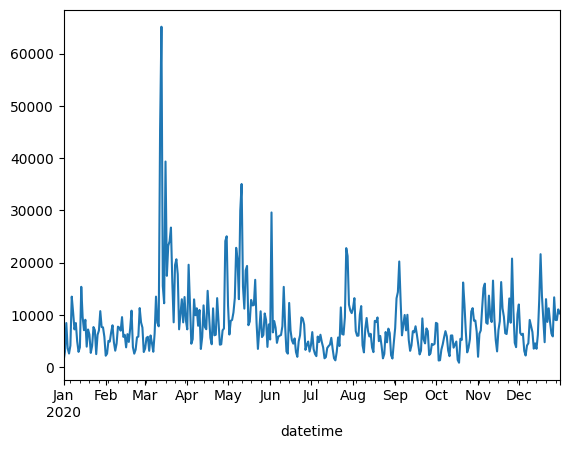

In [27]:
# Consolidation of per-second data points to days

# Filter data from within January 1, 2020 to December 31, 2020 (in timestamps)
df_2020 = df[(df['Timestamp'] >= 1577836800) & (df['Timestamp'] <= 1609459199)]
df_2020['datetime'] = df_2020['Timestamp'].apply(lambda x: pd.to_datetime(x, unit='s'))
df_2020.set_index('datetime', inplace=True)
daily_df = df_2020['Volume'].resample('D').sum()
daily_df.plot()

In [30]:
# Basic descriptive statistics (on volume)
mean = daily_df.mean()
median = daily_df.median()
mode = daily_df.mode()
st_dev = daily_df.std()
minim = daily_df.min()
maxim = daily_df.max()
quartile_25 = daily_df.quantile(0.25)
quartile_50 = daily_df.quantile(0.50)
quartile_75 = daily_df.quantile(0.75)

print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')
print(f'Standard Deviation: {st_dev}')
print(f'Minimum Value: {minim}')
print(f'Maximum Value: {maxim}')
print(f'25th Percentile: {quartile_25}')
print(f'50th Percentile: {quartile_50}')
print(f'75th Percentile: {quartile_75}')

Mean: 8394.83266740205
Median: 6910.03095048
Mode: 0        857.180562
1       1211.095270
2       1280.418512
3       1315.040369
4       1336.056862
           ...     
361    29933.155015
362    35068.012223
363    39368.135128
364    45318.776098
365    65172.144222
Name: Volume, Length: 366, dtype: float64
Standard Deviation: 6460.189088743303
Minimum Value: 857.18056237
Maximum Value: 65172.14422174
25th Percentile: 4523.1446954425
50th Percentile: 6910.03095048
75th Percentile: 10145.686427835
